In [1]:
import pandas as pd

In [3]:
df = pd.read_excel('/content/data_carradios_assign.xlsx')
df

,perc_defec,bdate,team,training,datep,prizeq,prized
0,0.00,1986-12-23,1,0,2021-07-01,500,600
1,3.61,1981-07-02,7,1,2021-07-02,500,0
2,21.17,1986-12-23,6,0,2021-07-05,0,0
3,29.18,1981-07-02,4,0,2021-07-06,0,0
4,15.63,1992-06-14,3,1,2021-07-07,0,0
...,...,...,...,...,...,...,...
1195,NaN,1986-12-23,5,1,NaT,0,600
1196,NaN,1992-06-14,6,0,NaT,0,0
1197,NaN,1981-07-02,5,1,NaT,0,600
1198,NaN,1981-07-02,1,0,NaT,500,600


In [4]:
import datetime

In [5]:
(datetime.datetime.now()-df['bdate']).astype('<m8[Y]')

0       36.0
1       41.0
2       36.0
3       41.0
4       30.0
        ... 
1195    36.0
1196    30.0
1197    41.0
1198    41.0
1199    30.0
Name: bdate, Length: 1200, dtype: float64

In [6]:
df['age'] = (datetime.datetime.now()-df['bdate']).astype('<m8[Y]')
df['age']

0       36.0
1       41.0
2       36.0
3       41.0
4       30.0
        ... 
1195    36.0
1196    30.0
1197    41.0
1198    41.0
1199    30.0
Name: age, Length: 1200, dtype: float64

In [7]:
df['weekdp'] = df['datep'].dt.weekday
df

,perc_defec,bdate,team,training,datep,prizeq,prized,age,weekdp
0,0.00,1986-12-23,1,0,2021-07-01,500,600,36.0,3.0
1,3.61,1981-07-02,7,1,2021-07-02,500,0,41.0,4.0
2,21.17,1986-12-23,6,0,2021-07-05,0,0,36.0,0.0
3,29.18,1981-07-02,4,0,2021-07-06,0,0,41.0,1.0
4,15.63,1992-06-14,3,1,2021-07-07,0,0,30.0,2.0
...,...,...,...,...,...,...,...,...,...
1195,NaN,1986-12-23,5,1,NaT,0,600,36.0,NaN
1196,NaN,1992-06-14,6,0,NaT,0,0,30.0,NaN
1197,NaN,1981-07-02,5,1,NaT,0,600,41.0,NaN
1198,NaN,1981-07-02,1,0,NaT,500,600,41.0,NaN


In [8]:
df.drop(['bdate', 'datep'], axis=1)

,perc_defec,team,training,prizeq,prized,age,weekdp
0,0.00,1,0,500,600,36.0,3.0
1,3.61,7,1,500,0,41.0,4.0
2,21.17,6,0,0,0,36.0,0.0
3,29.18,4,0,0,0,41.0,1.0
4,15.63,3,1,0,0,30.0,2.0
...,...,...,...,...,...,...,...
1195,NaN,5,1,0,600,36.0,NaN
1196,NaN,6,0,0,0,30.0,NaN
1197,NaN,5,1,0,600,41.0,NaN
1198,NaN,1,0,500,600,41.0,NaN


In [9]:
import seaborn as sns

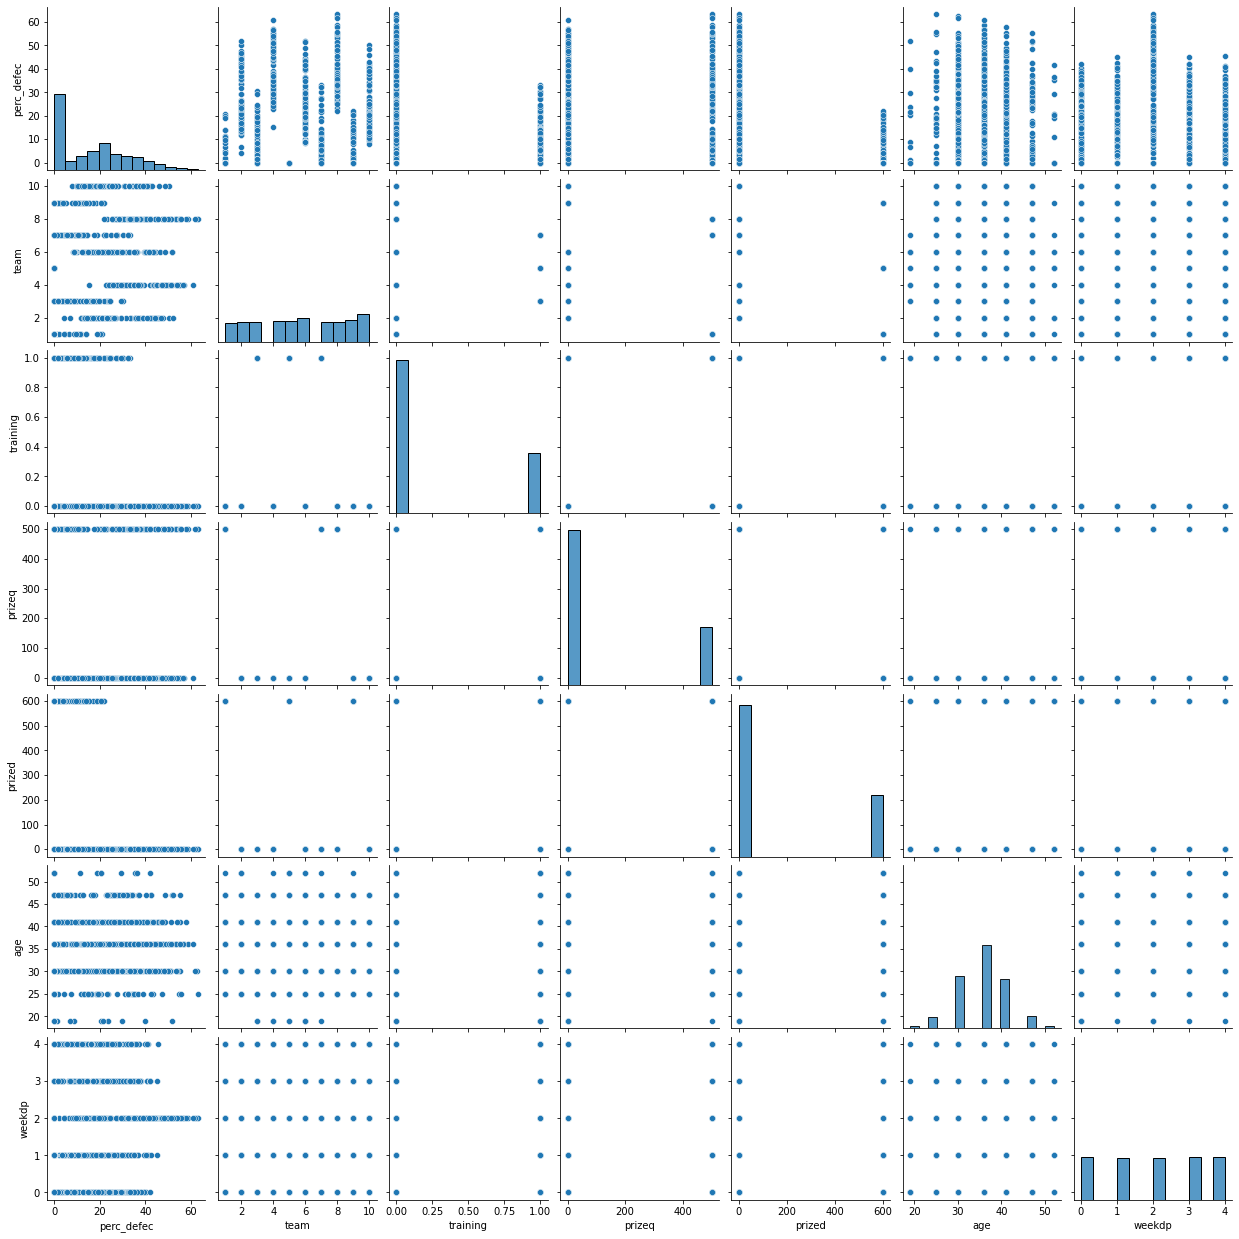

In [10]:
sns.pairplot(df)

**ANALYSIS**
* 1st plot => see next plot.
* 2nd plot => as we can see the team 8 is the one who has the highest percentage of defectives (median) and the team 5 doesn't have defective radios.
* 3rd plot => as we can see, with training the percentage of defectives radios decrease and with no training this percentage increases.
* 5th plot => as we can see, the lower the percentage of defective radios, the higher the prized.
* 6th plot => the variable age has no impact on the percentage of defectives radio, so maybe in a predicition model we should remove this variable.

<AxesSubplot:xlabel='perc_defec', ylabel='Count'>

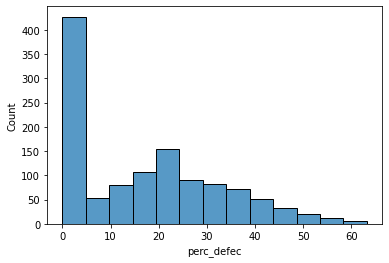

In [11]:
sns.histplot(df['perc_defec'])

This is an histogram and show us the distribution of the percentage of defective radios (frequency). As we can see, the most frequent percentage is zero, so there are not so many defective radios.

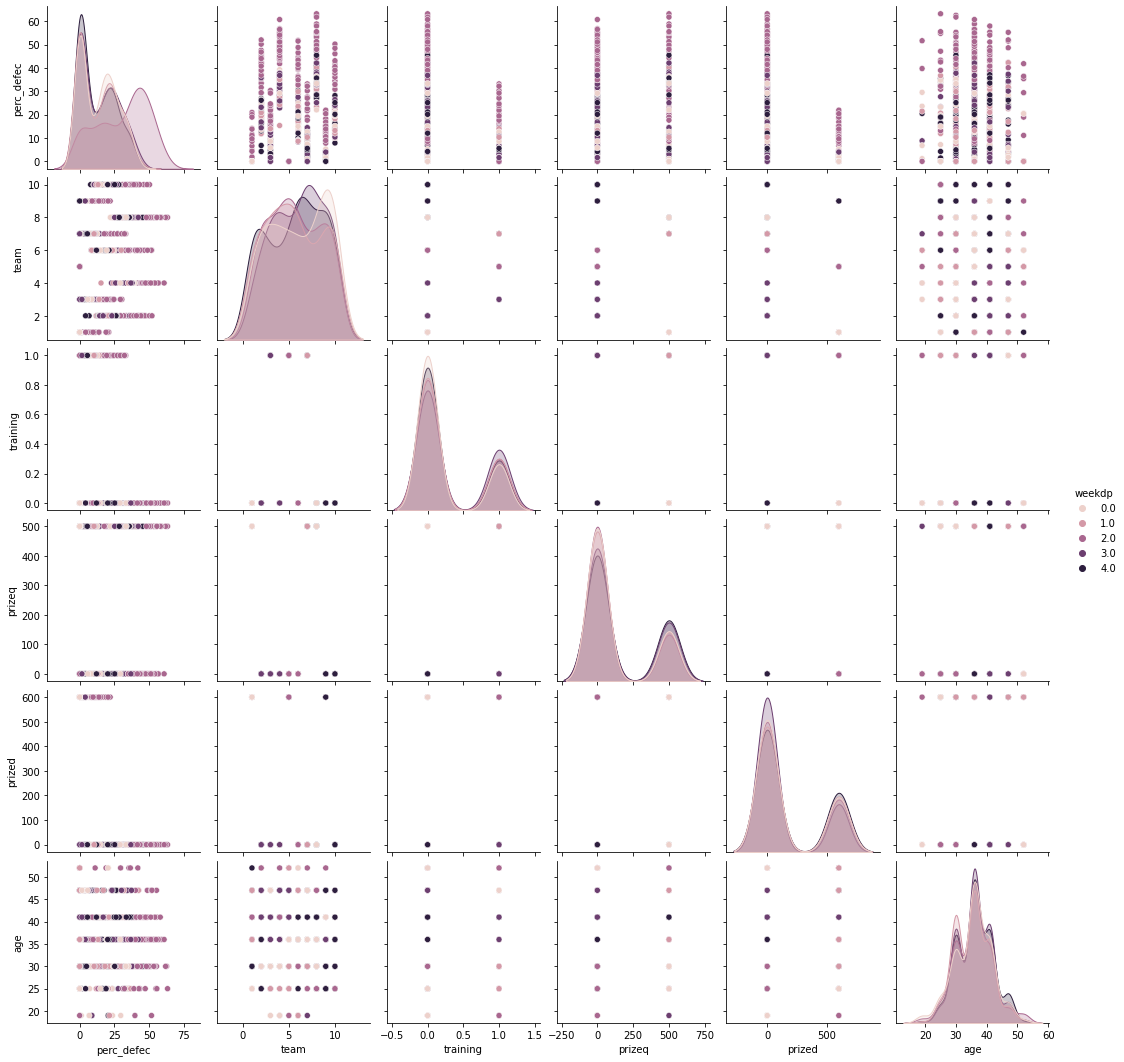

In [12]:
sns.pairplot(df, hue = 'weekdp')

<AxesSubplot:xlabel='weekdp', ylabel='perc_defec'>

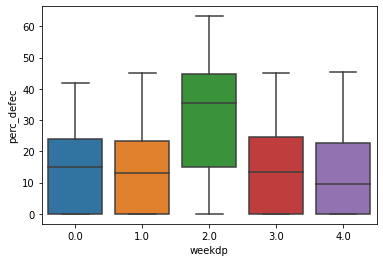

In [19]:
sns.boxplot(x=df['weekdp'], y=df['perc_defec'])

As we can see, the day of the week that has the highest percentage of defective radios is wednesday which is the line on the right.

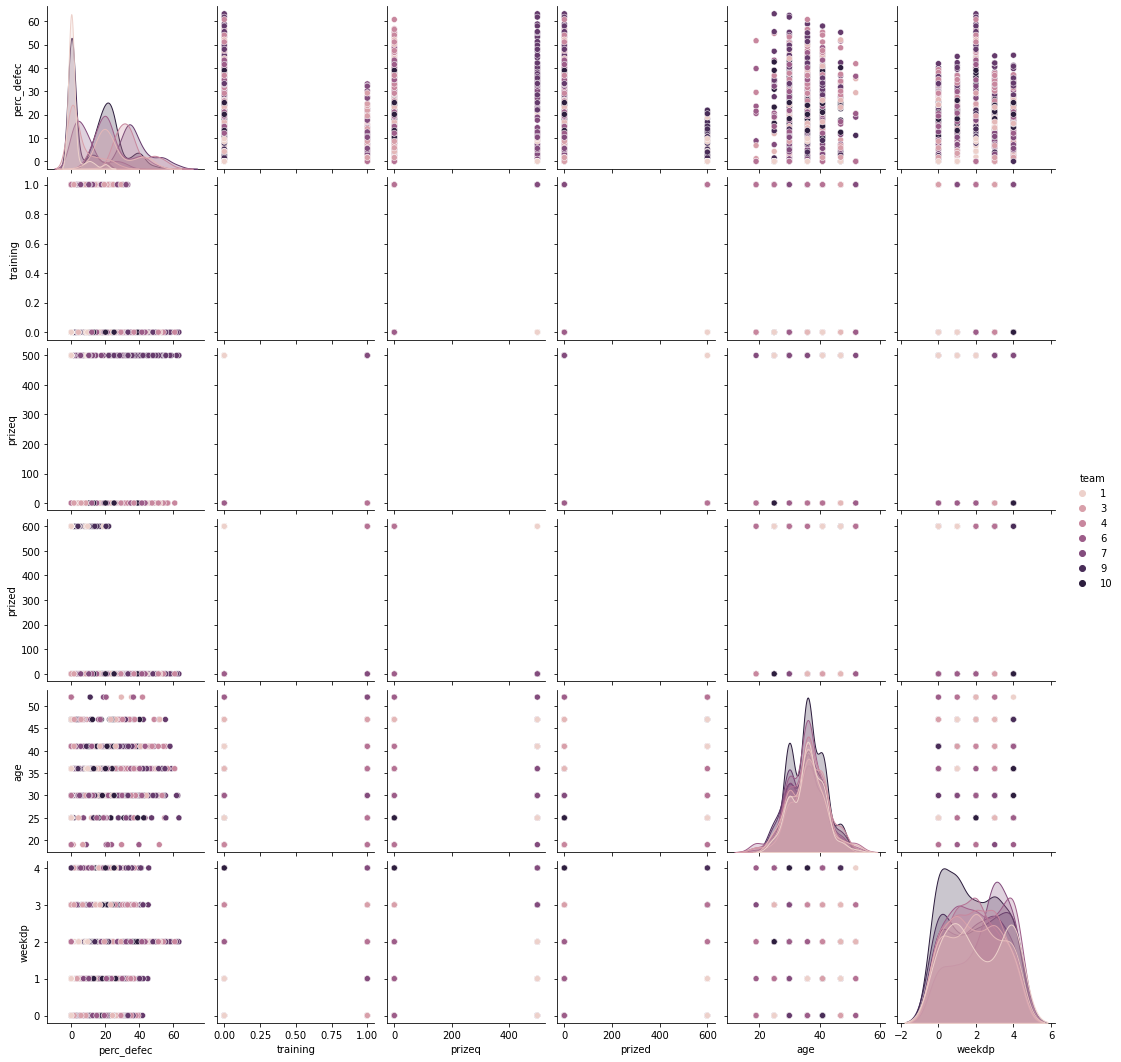

In [13]:
sns.pairplot(df, hue = 'team')

<AxesSubplot:xlabel='team', ylabel='perc_defec'>

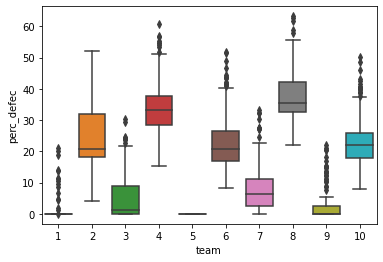

In [14]:
sns.boxplot(x=df['team'], y=df['perc_defec'])

This plot shows the same conclusions as the 2nd plot analyzed: the team 8 is the one who has the highest percentage of defective radios and the team 5 doesn't have. 


<AxesSubplot:xlabel='training', ylabel='perc_defec'>

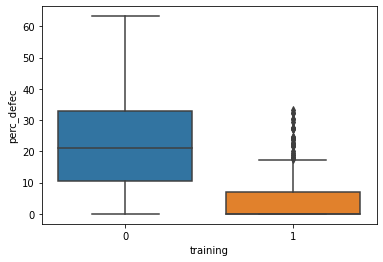

In [15]:
sns.boxplot(x=df['training'], y=df['perc_defec'])

Once again, this plot shows the same information as the 3rd one: it appears that training has some impact on the percentage of defective radios.

In [16]:
corrs = df.corr()
corrs

,perc_defec,team,training,prizeq,prized,age,weekdp
perc_defec,1.000000,0.158741,-0.484158,-0.005203,-0.627498,-0.009340,-0.022580
team,0.158741,1.000000,-0.162256,-0.067515,-0.112242,-0.029083,-0.005833
training,-0.484158,-0.162256,1.000000,0.070299,0.081575,-0.003785,0.036235
prizeq,-0.005203,-0.067515,0.070299,1.000000,0.041948,-0.024275,0.069890
prized,-0.627498,-0.112242,0.081575,0.041948,1.000000,-0.004446,-0.000967
age,-0.009340,-0.029083,-0.003785,-0.024275,-0.004446,1.000000,0.047785
weekdp,-0.022580,-0.005833,0.036235,0.069890,-0.000967,0.047785,1.000000


<AxesSubplot:>

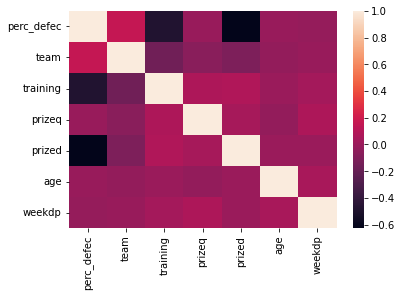

In [17]:
sns.heatmap(corrs)

As we can see, the variables that are related to the prize (prized and prizeq) show a small correlation. But, since this correlation is very small, in a prediction model we don't need to remove them.